Implementation of mnist neural network

Math behind the neural network:
In this case the network consists of 3 layers. The input layer, one hidden layer and one output layer.

The input layer contains 784 nodes since the image examples used as input are of size 28x28 pixels which equates to 784 individual pixels. Each pixel has a gray scale value that ranges from 0 (black) to 255 (white).
Each node of the input layer is connected to each node of the hidden layer, each node of the hidden layer is connected to each not of the output layer.

For this neural network the hidden layer contains 10 nodes. The amount of hidden layers and number of neurons per hidden layer is empirically chosen. 11 or 9 nodes could have also been chosen for the hidden layer. An extra layer would however introduce to much complexity for the type of problem tackeled here in the mnist data set and could even perform worse.

Finally the output layer logically contains 10 nodes, where each node corresponds to a digit 0-9. If after the values of an image propagates though the network and the fifth node of the output layer contains the highest value, it is understood that the network predicts that the number 5 is the most probable number written in the example/input image.

When it is said that nodes of one layer are "connected" to nodes of the next layer, the concept of weights comes into play. Basically the values of the input layer need to propagate through the neurons/nodes of the hidden layer which in turn again propagates the to the output layer. During the propagation, each node will receive the values coming from the previous layer and add them up. The KEY point here is that the value of a node do not get just "sent over" to the next node. The value of that node gets first multiplied by a weight, a parameter, unique for that especific connection between node A from layer $n-1$ and node B from layer $n$. 
Additionally there is also a bias parameter that also gets added into the entire mix. Mathematically, each node gets its value compute like so: $\text{node\_value} = \sum_{i=0}^{n} \text{prev\_node}_i \cdot \text{weight}_i + \text{bias}$

Using as example the input and the hidden layer, since each input node connects to every other single node of the hidden layer, each input node has 10 weights values, so in total there are $10 \cdot 784 = 7840$ weights/parameters between these layers plus 10 biases.

In order to break with the linearity of the network which increases the complexity of our network, an actvation function is introducte and is applied to the node after the propagated values are received and before the node propagates to the next layer. In the case of this project, the activation function is the ReLU function: $f(x) = max(0,x)$

It is easy to imagine that if the weights and biases of the neural network get randomly initialized, the values of the output layer are going to be complete nonsense. Basically the entire goal of training a neural network is to fine tune the values of the weights and biases so that after the input gets propagated, the output actually makes sense. The entire approach consists of these steps:
- Step 1: propagate an example image through the network;
- Step 2: Slightly alter the values of the weights and biases of the entire network, to make the output look a litte bit better (closer to the image true value -> value 5 if it is an image of a hand-written 5);
- Step 3: go to step 1 if predictions are still bad or stop if predictions are good enough;

Once the weights and biases the fine tuned, our neural network is trained.
The big question is how to properly adjust the weights after every propagation? The algorithm that efficiently does this is called gradient descent. Here is how it works:

Each layer, including the output layer, can be seen as a vector, where each node is an entry. Since the example images are labeled, after propagating an image through the untrained network, the output vector can be compared to the label vector where every entry is 0 except one with the value of 1. We can compute the difference of our result and the label by taking the square difference between our output vector (y_pred) and the label vector(y). This is usually known as the Loss or Cost function.
$$
\mathcal{L} = \frac{1}{2} \sum_{i=1}^{n} \left( y\_pred_i - y_i \right)^2
$$
The goal is to minimize this loss function! The problem is that this loss function is highly complex, there is no closed-form solution for it, we cannot simply calculate $Loss'(\theta) = 0$. We can however, still compute is gradient which tells us the "direction" (in a much higher dimension, but still) where the Loss function gets to a higher value the fastest. If we multiply this gradient by -1 we get the exact opposite, that is, the direction where the Loss gets lower the fastest.

Basically if we compute the gradient, we know how to nudge/tune our weights and biases. The thing is that because our Loss function is not convex, we cannot adjust our parameters to hard at once becuase we may overshoot our landing and go past the local minima we are looking for. This is why we adjust our parameters just a little bit in the negative gradient direction. Mathematically: 

\begin{aligned}
w_{i}^{t+1} &= w_{i}^t - \alpha \frac{\partial R}{\partial w_{i}} \\
b_{i}^{t+1} &= b_{i}^t - \alpha \frac{\partial R}{\partial b_{i}}
\end{aligned}

Where $W_i$ and $b_i$ are the weights are biases of each layer $\alpha$ is our step size and $\frac{\partial R}{\partial x_{i}}$ is the partial derivative of the Loss function in regard to parameter $x_i$

The last difficulty is to actually calculate the partial derivatives, which are the entries of our gradient vector. For that we use backpropagation which basically is to use the chain rule of analysis to compute the partial derivatives. This network has one set of weights and biases between input and hidden layer and another set between hidden and output layer. Mathematically:

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial W^{[2]}} &= \frac{\partial \mathcal{L}}{\partial A^{[2]}} \cdot \frac{\partial A^{[2]}}{\partial Z^{[2]}} \cdot \frac{\partial Z^{[2]}}{\partial W^{[2]}} \\
\frac{\partial \mathcal{L}}{\partial b^{[2]}} &= \frac{\partial \mathcal{L}}{\partial A^{[2]}} \cdot \frac{\partial A^{[2]}}{\partial Z^{[2]}} \cdot \frac{\partial Z^{[2]}}{\partial b^{[2]}} \\
\frac{\partial \mathcal{L}}{\partial W^{[1]}} &= \frac{\partial \mathcal{L}}{\partial A^{[2]}} \cdot \frac{\partial A^{[2]}}{\partial Z^{[2]}} \cdot \frac{\partial Z^{[2]}}{\partial A^{[1]}} \cdot \frac{\partial A^{[1]}}{\partial Z^{[1]}} \cdot \frac{\partial Z^{[1]}}{\partial W^{[1]}} \\
\frac{\partial \mathcal{L}}{\partial b^{[1]}} &= \frac{\partial \mathcal{L}}{\partial A^{[2]}} \cdot \frac{\partial A^{[2]}}{\partial Z^{[2]}} \cdot \frac{\partial Z^{[2]}}{\partial A^{[1]}} \cdot \frac{\partial A^{[1]}}{\partial Z^{[1]}} \cdot \frac{\partial Z^{[1]}}{\partial b^{[1]}}
\end{aligned}

Where

\begin{aligned}
Z^{[1]} &:= X \cdot W^{[1]} +  \overrightarrow{\mathbf{1}} \cdot b^{[1]} \\
A^{[1]} &:= \sigma \left(Z^{[1]}\right) \\
Z^{[2]} &:= A^{[1]} \cdot W^{[2]} + \overrightarrow{\mathbf{1}} \cdot b^{[2]} \\
A^{[2]} &:= \sigma \left(Z^{[2]}\right)
\end{aligned}



For this project, in order to get a deeper understanding of how a neural network functions, frameworks like pytorch and tensorflow are not used here. The forward and backpropagation functions are implemented here from scratch. These are the libraries used:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

To makes this implementation more modular, which makes tweeks easier in the future, I opted to make use of classes for my layers and a my neural network itself.

In [2]:
class Layer:
    def __init__(self, input_size, output_size, output_layer):
        self.input_size = input_size
        self.output_size = output_size
        #start biases with either 0s or very small values
        self.biases = np.random.randn(output_size, 1)*0.1
        #use He init because it works best with ReLU activations
        self.weights = np.random.randn(output_size, input_size) * np.sqrt(2. / input_size)
    
        if output_layer:
            self.activation_func = lambda x: x
            self.activation_prime = lambda x: 1
        else:
            self.activation_func = lambda x: np.maximum(0, x)
            self.activation_prime = lambda x: (x > 0)
        

In [3]:
class NeuralNetwork:
    def __init__(self, hidden_layer_sizes):
        self.layers = []
        #cache to store Z_k and A_k computed during forward_prop to use them in back_prop
        self.cache = []
        #input layer:
        self.layers.append(Layer(784, 10, False))
        #add hidden layers
        for i in range(len(hidden_layer_sizes)):
            self.layers.append(Layer(hidden_layer_sizes[i][0], hidden_layer_sizes[i][1], False))
        #add output layer
        if len(hidden_layer_sizes) > 0:
            self.layers.append(Layer(hidden_layer_sizes[len(hidden_layer_sizes)-1][1], 10, True))
        else:
            self.layers.append(Layer(10, 10, True))

        self.output = None

    def soft_max(self, Z):
        Z_shifted = Z - np.max(Z, axis=0, keepdims=True)  # prevent overflow
        expZ = np.exp(Z_shifted)
        return expZ / np.sum(expZ, axis=0, keepdims=True)


    def forward_prop(self, X):
        A_prev = X
        self.cache = []
        for layer in self.layers:
            # even though W * A_prev is of dimension 10xbatch and the biases is 10x1 numby automatically broadcasts
            #the biases to each column of W * A_prev
            Z = np.dot(layer.weights, A_prev)  + layer.biases
            A_current = layer.activation_func(Z)
            self.cache.append((Z, A_prev))
            #for this layer A_current is the output of the layer, for the next layer it will be its input
            A_prev = A_current
        self.output = self.soft_max(A_prev)
        return self.output

    #using MSE loss where L = 1/2m * sum(Y-A)² where m is the batch size
    def back_prop(self, Y, batch, learning_rate):
       
        dA = (self.output - Y)

        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]
            Z, A_prev = self.cache[i]
            #dX here means partial derivative in regard to X. Think of it like the chain rule until X
            dZ = dA * layer.activation_prime(Z)
            dW = 1/batch * np.dot(dZ, A_prev.T) 
            db = 1/batch * np.sum(dZ, axis=1, keepdims=True) 
            dA = np.dot(layer.weights.T, dZ)

            # update
            layer.weights -= learning_rate * dW
            layer.biases -= learning_rate * db

        
        
    def get_predictions(self, Y_pred):
        return np.argmax(Y_pred, 0)

    def get_accuracy(self, predictions, Y_scalar):
        return np.sum(predictions == Y_scalar) / Y_scalar.size

    def get_batch(self, batch_size, train_data, offset):
        X = train_data[offset*batch_size : (offset+1)*batch_size,1:].T / 255.
        Y_scalar = train_data[offset*batch_size : (offset+1)*batch_size,0]
        Y = np.zeros((10, Y_scalar.shape[0]))
        Y[Y_scalar, np.arange(Y_scalar.shape[0])] = 1
        return X, Y, Y_scalar
        
    def train_nn(self,train_data, batch_size, epochs, steps_per_epoch, learning_rate):
        for epoch in range(epochs):
            #shuffle the training data after every epoch
            np.random.shuffle(train_data)
            for batch in range(steps_per_epoch):
                #get current batch of examples
                X_train, Y_train, Y_train_scalar = self.get_batch(batch_size, train_data, batch)
               #first do the forward propagation of the mini-batch
                Y_pred = self.forward_prop(X_train)
                #check accuracy:
                if batch % 100 == 0 and epoch % 5 == 0:
                    print(f"Epoch {epoch}, batch {batch} -> Accuracy: {self.get_accuracy(self.get_predictions(Y_pred), Y_train_scalar)}")
                #now we do the backwards propagation and update the weights
                self.back_prop(Y_train, batch_size, learning_rate)
        return 0  

    def test_nn(self, test_data):
        #just wanna test to see if the training is working. no need to use batch testing
        X_test = test_data[:, 1:].T
        Y_test_scalar = test_data[:,0]
        Y_pred = self.forward_prop(X_test)
        print("Test Accuracy (on entire test set): ", self.get_accuracy(self.get_predictions(Y_pred), Y_test_scalar))
        
            

Now we initialize an instance of the class, train, and finally test our model

In [4]:
nn = NeuralNetwork([])
i = 0
for layer in nn.layers:
    print(f"Layer: {i}")
    print(f"Weights matrix dimentions: {layer.weights.shape[0]} by {layer.weights.shape[1]}")
    print(f"Biases vector dimentions: {layer.biases.shape[0]} by {layer.biases.shape[1]} ")
    i= i+1
    print()

nn.train_nn(pd.read_csv("mnist_train.csv").to_numpy(), 100, 30, 600, 0.1)
nn.test_nn(pd.read_csv("mnist_test.csv").to_numpy())



    

Layer: 0
Weights matrix dimentions: 10 by 784
Biases vector dimentions: 10 by 1 

Layer: 1
Weights matrix dimentions: 10 by 10
Biases vector dimentions: 10 by 1 

Epoch 0, batch 0 -> Accuracy: 0.09
Epoch 0, batch 100 -> Accuracy: 0.78
Epoch 0, batch 200 -> Accuracy: 0.76
Epoch 0, batch 300 -> Accuracy: 0.81
Epoch 0, batch 400 -> Accuracy: 0.92
Epoch 0, batch 500 -> Accuracy: 0.93
Epoch 5, batch 0 -> Accuracy: 0.96
Epoch 5, batch 100 -> Accuracy: 0.9
Epoch 5, batch 200 -> Accuracy: 0.89
Epoch 5, batch 300 -> Accuracy: 0.95
Epoch 5, batch 400 -> Accuracy: 0.96
Epoch 5, batch 500 -> Accuracy: 0.97
Epoch 10, batch 0 -> Accuracy: 0.91
Epoch 10, batch 100 -> Accuracy: 0.97
Epoch 10, batch 200 -> Accuracy: 0.97
Epoch 10, batch 300 -> Accuracy: 0.91
Epoch 10, batch 400 -> Accuracy: 0.92
Epoch 10, batch 500 -> Accuracy: 0.91
Epoch 15, batch 0 -> Accuracy: 0.92
Epoch 15, batch 100 -> Accuracy: 0.95
Epoch 15, batch 200 -> Accuracy: 0.93
Epoch 15, batch 300 -> Accuracy: 0.95
Epoch 15, batch 400 ->

Final Test Accuracy is of approx. 92% on the test data set, which is pretty cool.

This part is made for pure visualization of the trained model. We take 10 random examples from the test data and to a prediction of them. To make this fun we also show the image used as input for the model.

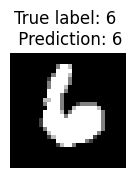

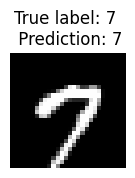

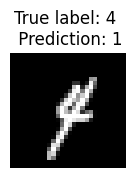

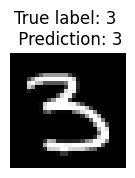

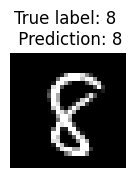

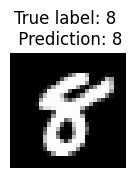

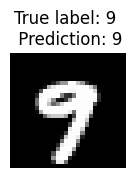

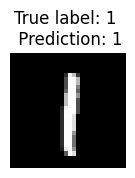

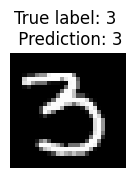

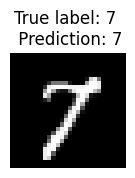

In [5]:
import matplotlib.pyplot as plt

def test_with_visualization(test_data, nn):
    for i in range(10):
        # 1. Pick a random test index
        r = np.random.randint(0, 10000)
        test_row = test_data[r]

        # 2. Extract label and input
        label = test_row[0]
        test_example = test_row[1:].reshape(784, 1) / 255.0  # shape (784, 1)

        
        prediction = nn.forward_prop(test_example)
        prediction = nn.get_predictions(prediction)
        
        # Show the image
        plt.figure(figsize=(1.5, 1.5))
        plt.imshow(test_example.reshape(28, 28), cmap='gray')
        plt.title(f"True label: {label} \n Prediction: {prediction[0]}")
        plt.axis('off')
        plt.show()

test_with_visualization(pd.read_csv("mnist_test.csv").to_numpy(), nn)